# Classification of Dogs & Cats using Fastai 

The Oxford-IIIT Pet [Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/) is used. We have created a 37 category pet dataset with roughly 200 images for each class. The images have a large variations in scale, pose and lighting. All images have an associated ground truth annotation of breed, head ROI, and pixel level trimap segmentation.

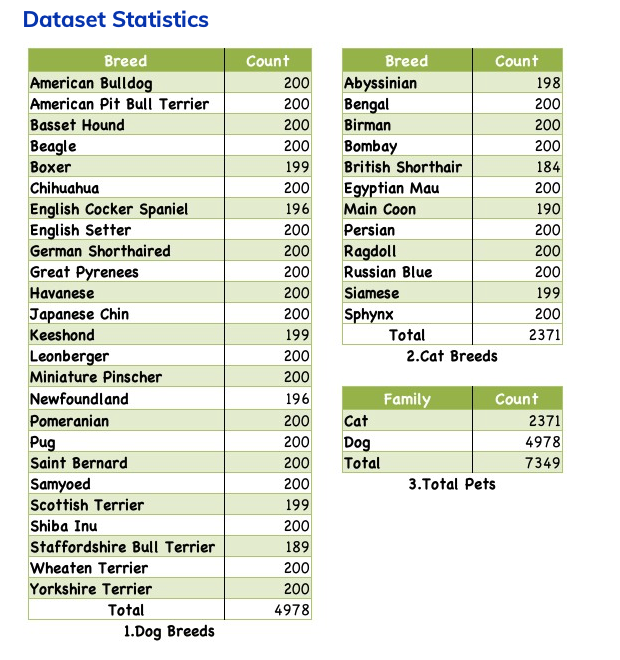

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
!pip show fastbook

Name: fastbook
Version: 0.0.18
Summary: Deep Learning for Coders, 2020
Home-page: https://github.com/fastai/fastbook
Author: Jeremy Howard and Sylvain Gugger
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: nbdev, pandas, ipywidgets, sentencepiece, pip, fastai, requests, packaging
Required-by: 


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Nov 20 13:46:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    35W / 250W |   4341MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))
 
if ram_gb < 20:
 print('Not using a high-RAM runtime')
else:
 print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
#id first_training
#caption Results from the first training
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.163549,0.022192,0.006766,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.049869,0.020453,0.007442,00:33



NOTES on how the above function works !!!!! Extremely interesting... & Mind blowing!!
```
from fastai.vision.all import *

———————

ninjas-MacBook-Pro:vision ninjawarrior$ pwd
/Users/ninjawarrior/miniconda3/envs/fastai/lib/python3.7/site-packages/fastai/vision
ninjas-MacBook-Pro:vision ninjawarrior$ ls -lrt
total 232
-rw-r--r--   1 ninjawarrior  staff      1 Nov 20 19:29 __init__.py
-rw-r--r--   1 ninjawarrior  staff    206 Nov 20 19:29 all.py
-rw-r--r--   1 ninjawarrior  staff  41947 Nov 20 19:29 augment.py
-rw-r--r--   1 ninjawarrior  staff   9855 Nov 20 19:29 core.py
-rw-r--r--   1 ninjawarrior  staff   9859 Nov 20 19:29 data.py
-rw-r--r--   1 ninjawarrior  staff  14430 Nov 20 19:29 gan.py
-rw-r--r--   1 ninjawarrior  staff  14380 Nov 20 19:29 learner.py
-rw-r--r--   1 ninjawarrior  staff   3821 Nov 20 19:29 utils.py
-rw-r--r--   1 ninjawarrior  staff   3681 Nov 20 19:29 widgets.py
drwxr-xr-x  11 ninjawarrior  staff    352 Nov 20 19:29 __pycache__
drwxr-xr-x   8 ninjawarrior  staff    256 Nov 20 20:14 models


from . import models
from ..basics import *
from ..callback.all import *
from .augment import *
from .core import *
from .data import *
from .models.all import *
	from .xresnet import *
	from .unet import *
	from .tvm import *
from .learner import *
from .utils import *

———————
path = untar_data(URLs.PETS)/'images'

   "PETS":[
      "https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz",
      811706944,
      "e4db5c768afd933bb91f5f594d7417a4"

<function fastai.data.external.untar_data>

/Users/ninjawarrior/miniconda3/envs/fastai/lib/python3.7/site-packages/fastai/data
ninjas-MacBook-Pro:data ninjawarrior$ ls -lrt
total 200
-rw-r--r--   1 ninjawarrior  staff      1 Nov 20 19:29 __init__.py
-rw-r--r--   1 ninjawarrior  staff    140 Nov 20 19:29 all.py
-rw-r--r--   1 ninjawarrior  staff   9033 Nov 20 19:29 block.py
-rw-r--r--   1 ninjawarrior  staff   8665 Nov 20 19:29 checks.txt
-rw-r--r--   1 ninjawarrior  staff  18406 Nov 20 19:29 core.py
-rw-r--r--   1 ninjawarrior  staff   9436 Nov 20 19:29 download_checks.py
-rw-r--r--   1 ninjawarrior  staff   9190 Nov 20 19:29 load.py
-rw-r--r--   1 ninjawarrior  staff  15397 Nov 20 19:29 transforms.py
drwxr-xr-x  10 ninjawarrior  staff    320 Nov 20 19:29 __pycache__
-rw-r--r--   1 ninjawarrior  staff   5330 Nov 20 20:09 external.py



<external.py> 

def untar_data(url, archive=None, data=None, c_key='data', force_download=False):#, extract_func=file_extract, timeout=4):
    "Download `url` to `fname` if `dest` doesn't exist, and extract to folder `dest`"
    d = FastDownload(fastai_cfg(), module=fastai.data, archive=archive, data=data, base='~/.fastai’)
    return d.get(url, force=force_download, extract_key=c_key)


<fastdownload>
__init__.py
from fastdownload.core import *

In core file … 



```



In [ ]:
ImageDataLoaders.from_name_func

<bound method ImageDataLoaders.from_name_func of <class 'fastai.vision.data.ImageDataLoaders'>>

In [ ]:
untar_data

<function fastai.data.external.untar_data>

In [ ]:
cnn_learner

<function fastai.vision.learner.cnn_learner>

In [ ]:
fine_tune

NameError: ignored

In [ ]:
1+1

2

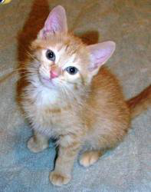

In [ ]:
from fastbook import *
img = PILImage.create(image_cat())
img.to_thumb(192)

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 0.999548


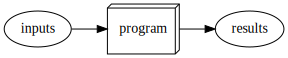

In [ ]:
#hide_input
#caption A traditional program
#id basic_program
#alt Pipeline inputs, program, results
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')